# Project 1: Counting words in college subreddits

Due 9/16. Reminder that you are allowed to use any amount of AI assistance or outside resources with citation

## Part 1: word counting and bag of words

In [1]:
#install spacy in the current conda environment
!pip install spacy
!pip install scikit-learn




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\false\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\false\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#download a small language model to help with cleaning tasks
!python -m spacy download en_core_web_sm



     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 108.9 kB/s eta 0:01:58
     --------------------------------------- 0.0/12.8 MB 108.9 kB/s eta 0:01:58
     --------------------------------------- 0.0/12.8 MB 108.9 kB/s eta 0:01:58
     --------------------------------------- 0.0/12.8 MB 109.5 kB/s eta 0:01:57
     --------------------------------------- 0.0/12.8 MB 122.9 kB/s eta 0:01:44
     --------------------------------------- 0.1/12.8 MB 145.8 kB/s eta 0:01:28
     --------------------------------------- 0.1/12.8 MB 178.6 kB/s eta 0:01:12
      -------------------------------------- 0.2/12.8 MB 479.2 kB/s eta 0:00:27
     - ------------------------------------- 0.3/12.8 MB 773.3 kB/s eta 0:00:17
     - -------------------------------------- 0.5/12.8 MB 1.0 MB


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\false\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
#import required libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import spacy
language_model = spacy.load("en_core_web_sm")
import matplotlib.pyplot as plt

import numpy as np

### Problem 1 and example: common words in the Michigan subreddit

In [2]:
#read the data from a csv file in the folder
mich=pd.read_csv("umich.csv")

In [3]:
#jupyter will print a pretty representation of most python objects if you just put the name
#we can see that the full text of each reddit comment is provided in the "text" column
mich

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 15:33:20,2,"Zingermans has a nice reuben, pretty pricey bu...",Suspicious-Bad703,2
1,1,2024-09-04 15:33:20,2,I really love Tomokun!,webstbre000,2
2,2,2024-09-04 15:33:20,2,The Seoul is pretty good I especially like the...,iaxlmao,1
3,3,2024-09-04 15:33:20,2,A lot of it depends on what type of food and w...,I-696,1
4,4,2024-09-04 14:32:17,1,You can book completely enclosed private study...,sneep_,2
...,...,...,...,...,...,...
8334,8334,2024-07-02 12:35:36,9,It isn’t a student org,Vibes_And_Smiles,1
8335,8335,2024-07-02 11:07:10,0,Life \nMatter \nLife's matter,tctu,8
8336,8336,2024-07-02 11:07:10,0,google,SUPERazkari,4
8337,8337,2024-07-02 11:07:10,0,That’s a hard question to answer for a set of ...,Own-Resident-3837,-1


In [4]:
#this is a function that does some light cleaning, by removing newline characters, converting to lowercase, and removing punctuation

def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

In [7]:
#pandas allows us to quickly apply this cleaning function to all rows in a column
mich['cleaned_text'] = mich['text'].apply(clean)

In [8]:
#we can see the first comment after cleaning vs before
mich["cleaned_text"][0]

'zingermans has a nice reuben pretty pricey but the sammies are pretty big'

In [9]:
mich["text"][0]

'Zingermans has a nice reuben, pretty pricey but the sammies are pretty big'

In [10]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [11]:
#this is a sparse matrix, which is a more efficient way to store a matrix with many zeros
#the matrix has 8339 rows (one for each comment) and 15289 columns (one for each unique word in the dataset)
bag_of_words

<8339x15289 sparse matrix of type '<class 'numpy.int64'>'
	with 221217 stored elements in Compressed Sparse Row format>

In [12]:
#create a dataframe from the sparse matrix
#this is a more human-readable way to view the data
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
bow_df

,aa,aadl,aapd,aata,ab,abab,abandon,abandoned,abbreviation,abbreviations,...,zoned,zones,zoning,zoo,zoom,zoomer,zoomers,zuckerberg,𝓲𝓷𝓼𝓮𝓬𝓾𝓻𝓮,𝘢𝘩𝘦𝘮
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8335,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8336,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#dataframes have a convenient method for summing the values in each column
#this will give us the number of times each word appears in the dataset
word_counts = bow_df.sum()
#we can sort the values to see the most common words
word_counts = word_counts.sort_values(ascending=False)

#notice that the top words are not very informative, as they are common words that appear in many contexts
#and bottom words include a lot of typos and other noise
word_counts

the            11306
to              8480
and             6921
you             6256
of              5028
               ...  
journals           1
journeywhen        1
jpg                1
js                 1
𝘢𝘩𝘦𝘮               1
Length: 15289, dtype: int64

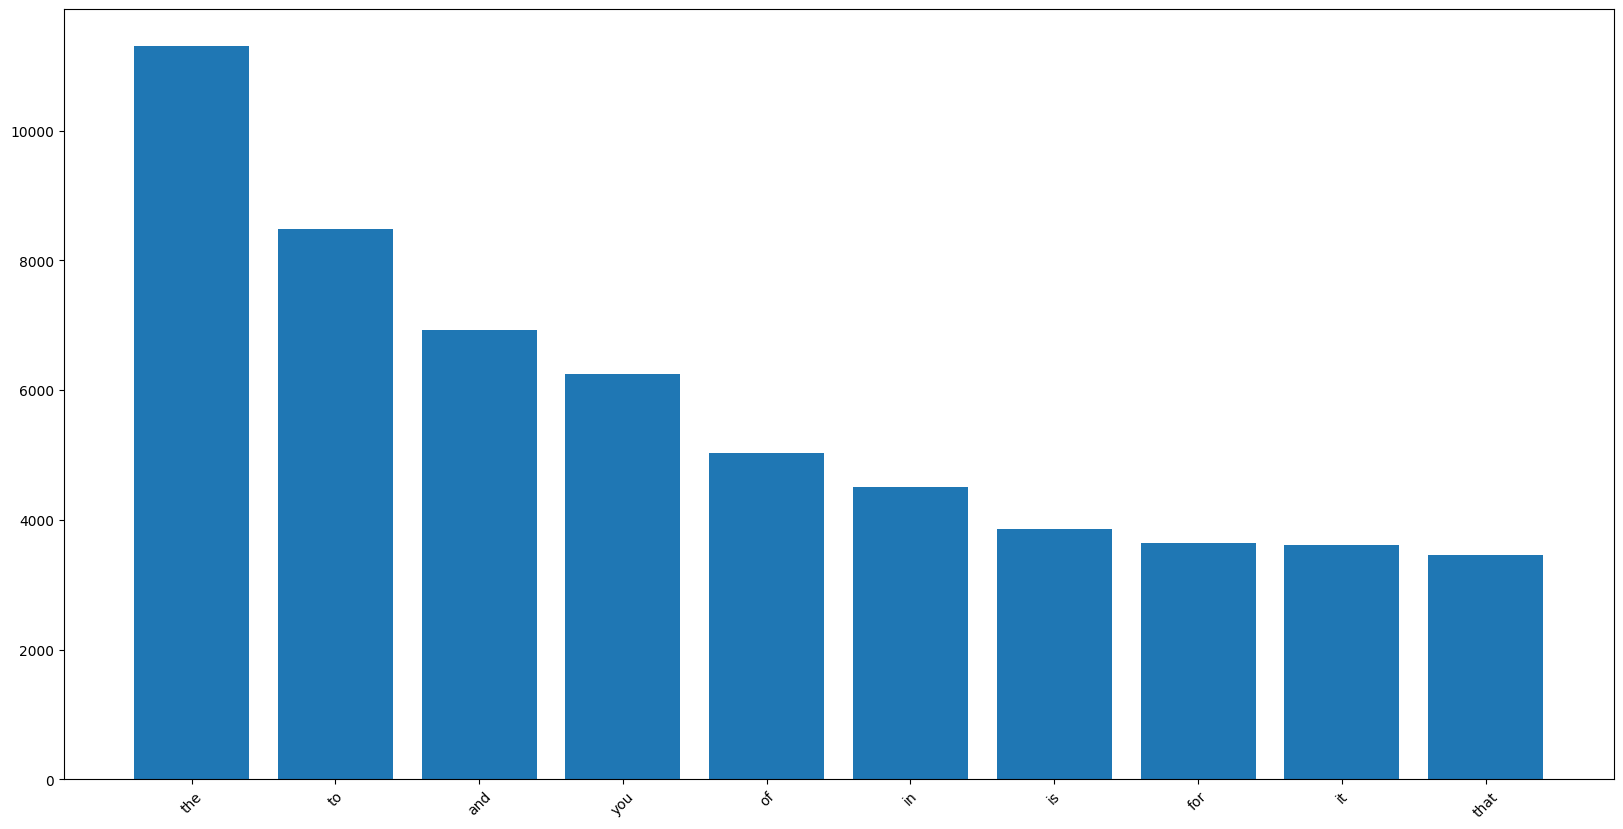

In [14]:
#we can plot the most common words
#we will only plot the top 10 words for readability
word_counts = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(word_counts.index, word_counts.values)
plt.xticks(rotation=45)
plt.show()

#### Question 1: what do you notice about the words in this plot? Is this useful for studying the community?

Answer here: Absolutely not. It's just a ton of grammatical words that are used to help humans understand the text. We need to lemmatize to only save the content-based words.

#### Lemmatization and stopword removal

In [15]:
#lemmatization function from the openclassrooms reading
def lemmatize(text):

   doc = language_model(text)

   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

   return ' '.join(tokens)

In [16]:
#we can further process the text by removing stopwords and lemmatizing
mich['lemmatized_text'] = mich['cleaned_text'].apply(lemmatize)

In [17]:
#count vectorizer also has parameters min_df and max_df that can be used to filter out words that are too rare or too common
#min_df=3 means that a word must appear in at least 3 documents to be included, this will remove typos and rare words
#max_df=0.3 means that a word must appear in at most 30% of documents to be included, this will remove corpus-specific stopwords

#we are also able to include n-grams in the count vectorizer
#n-grams are sequences of n words that appear together in the text
#the n-gram_range parameter specifies the minimum and maximum n-gram size to include (so in this case, we are including both unigrams and bigrams)

vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(mich['lemmatized_text'])

In [18]:
#we can see that we filtered out 11000 common words and typos
bag_of_words

<8339x8608 sparse matrix of type '<class 'numpy.int64'>'
	with 126768 stored elements in Compressed Sparse Row format>

In [19]:
#we can repeat the previous code to create a dataframe and count the words
bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

not              2863
student          1183
like             1183
people           1124
class             988
                 ... 
club campus         3
open not            3
open source         3
club activity       3
luck search         3
Length: 8608, dtype: int64

In [21]:
#we can convert this to a percentage instead of an absolute count by dividing by the total number of words
word_counts = word_counts / word_counts.sum()

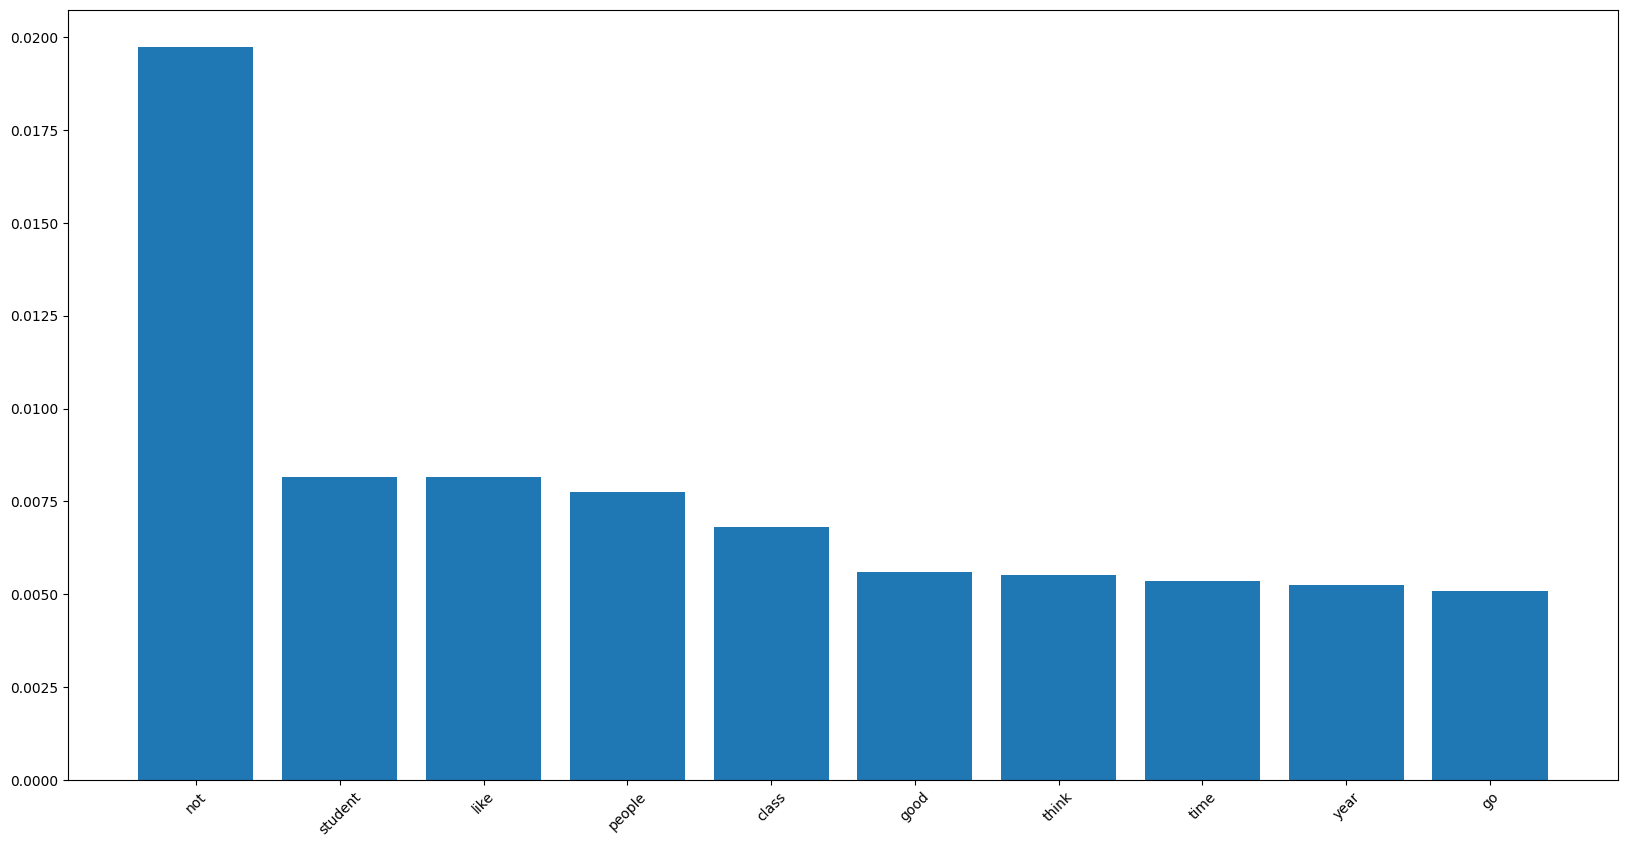

In [22]:
#we can plot the most common words
#we will only plot the top 10 words for readability
plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

In [23]:
#pandas allows us to access specific words in the series using the index
word_counts["student loan"]

4.1400153180566765e-05

In [24]:
#we can also use a list of words to compare and plot specific words
plot_list=word_counts[["history", "business", "computer science", "cs", "computer"]]
plot_list

history             0.000352
business            0.000600
computer science    0.000035
cs                  0.001228
computer            0.000262
dtype: float64

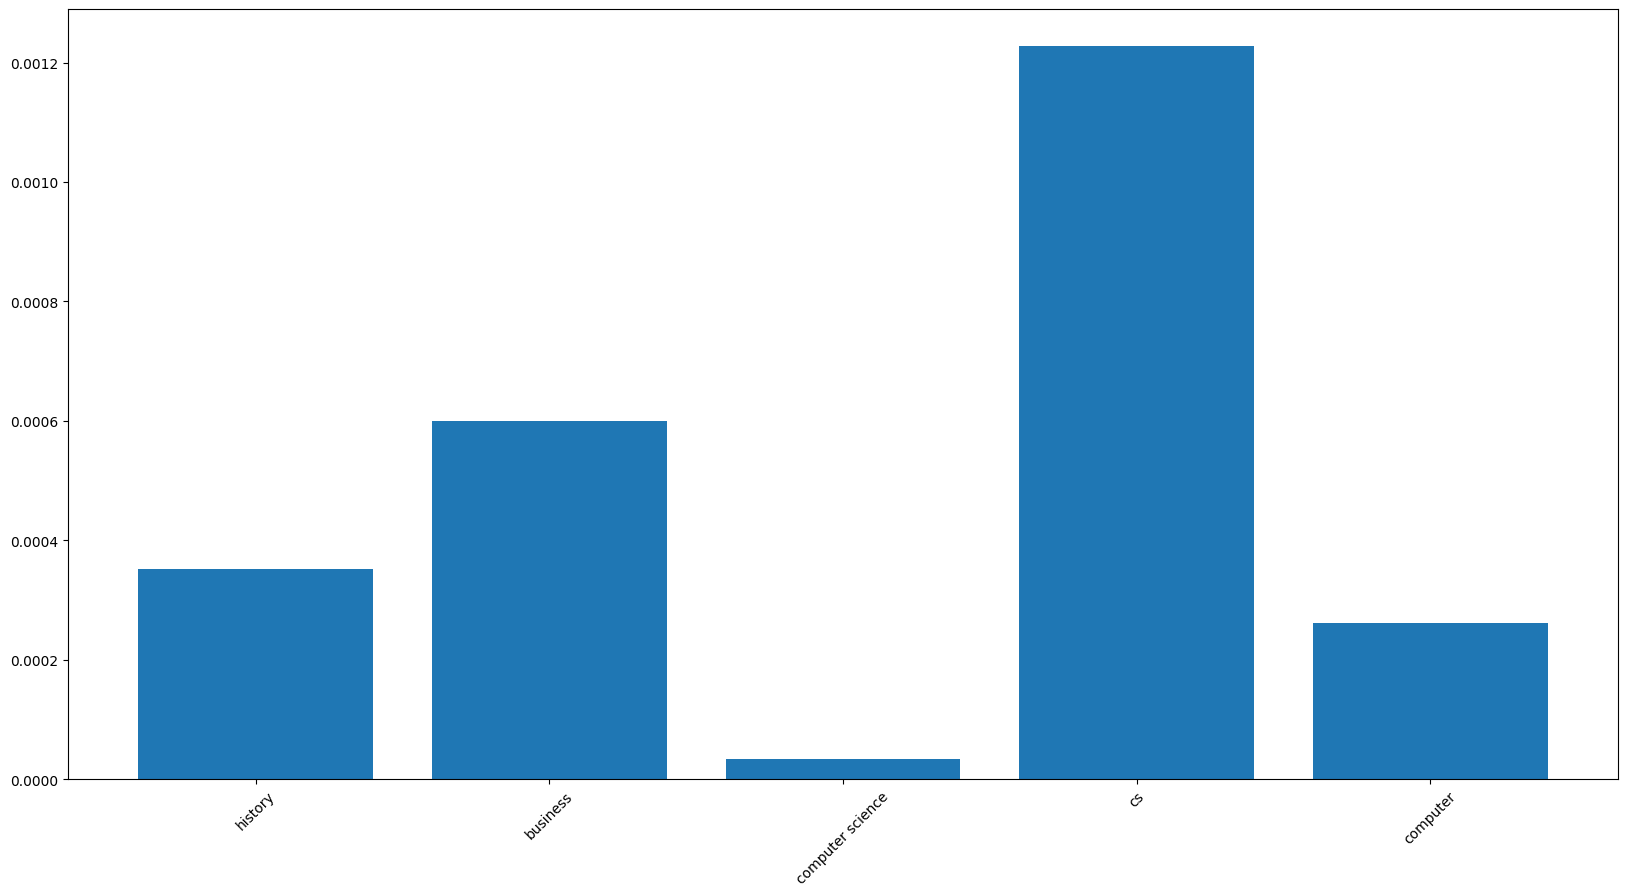

In [25]:

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#### Question 2:

In [26]:
#TODO: pick 5 words that you find interesting or are curious about, and plot a bar plot of their frequency in this dataset 

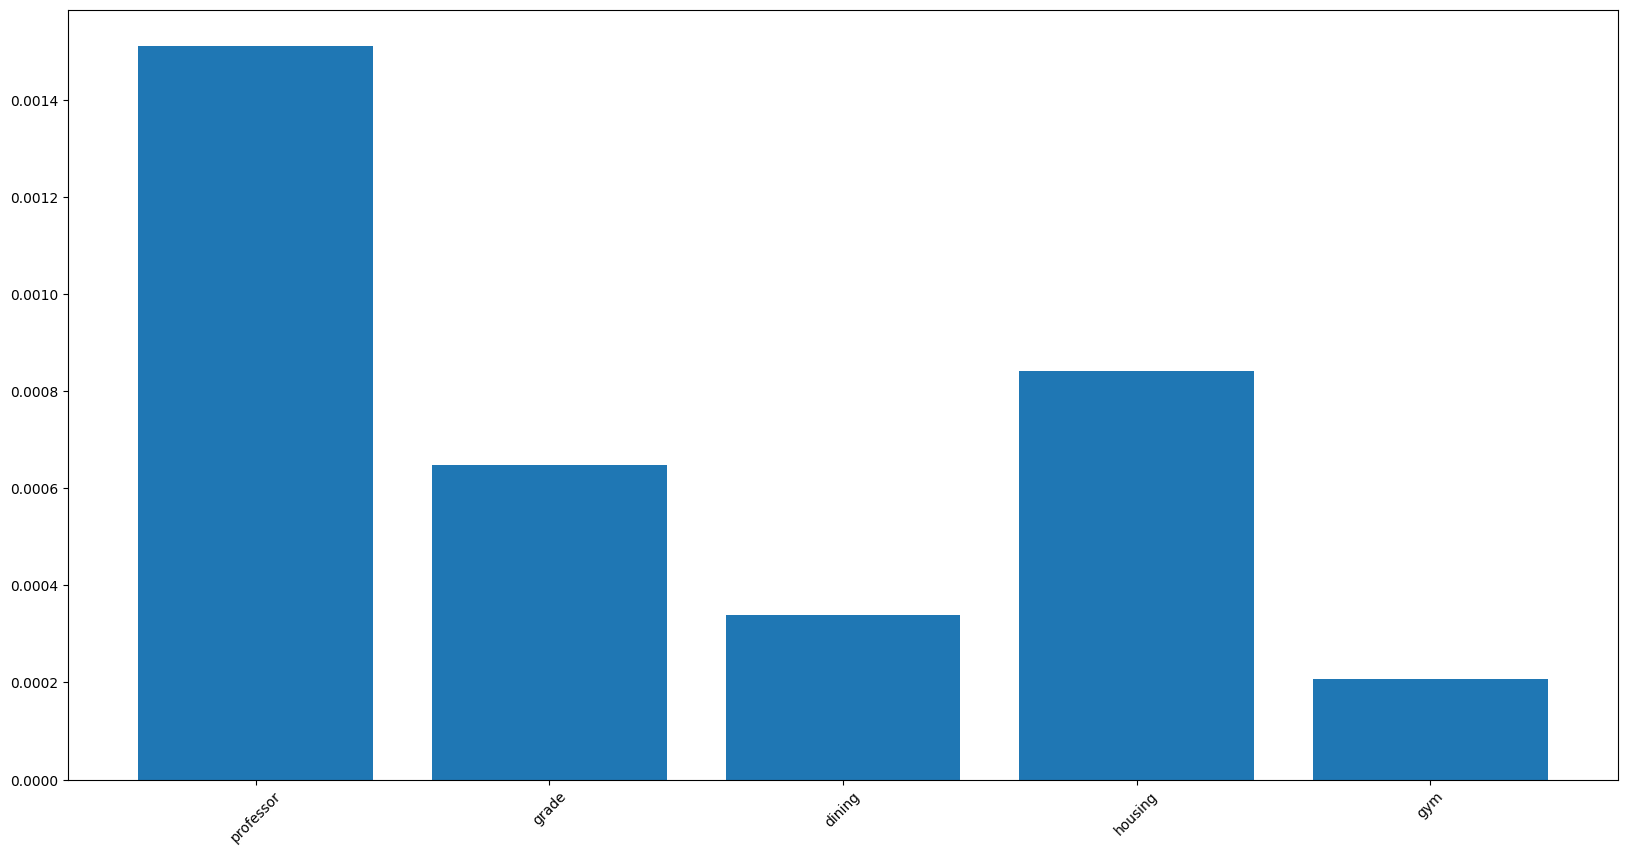

In [27]:
#Professor, grade, dining, housing, gym
plot_list=word_counts[["professor", "grade", "dining", "housing", "gym"]]
plot_list
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()



### Problem 2: repeat this process with the Illinois subreddit data (in this directory as "uiuc.csv"). You should not have to change too much in the previous code besides the dataframe path and name. Your notebook should include the two bar graphs including and excluding stopwords. Use the same 5 words and compare their relative frequency between the two subreddits. Discuss any interesting differences you notice in a short markdown cell. 

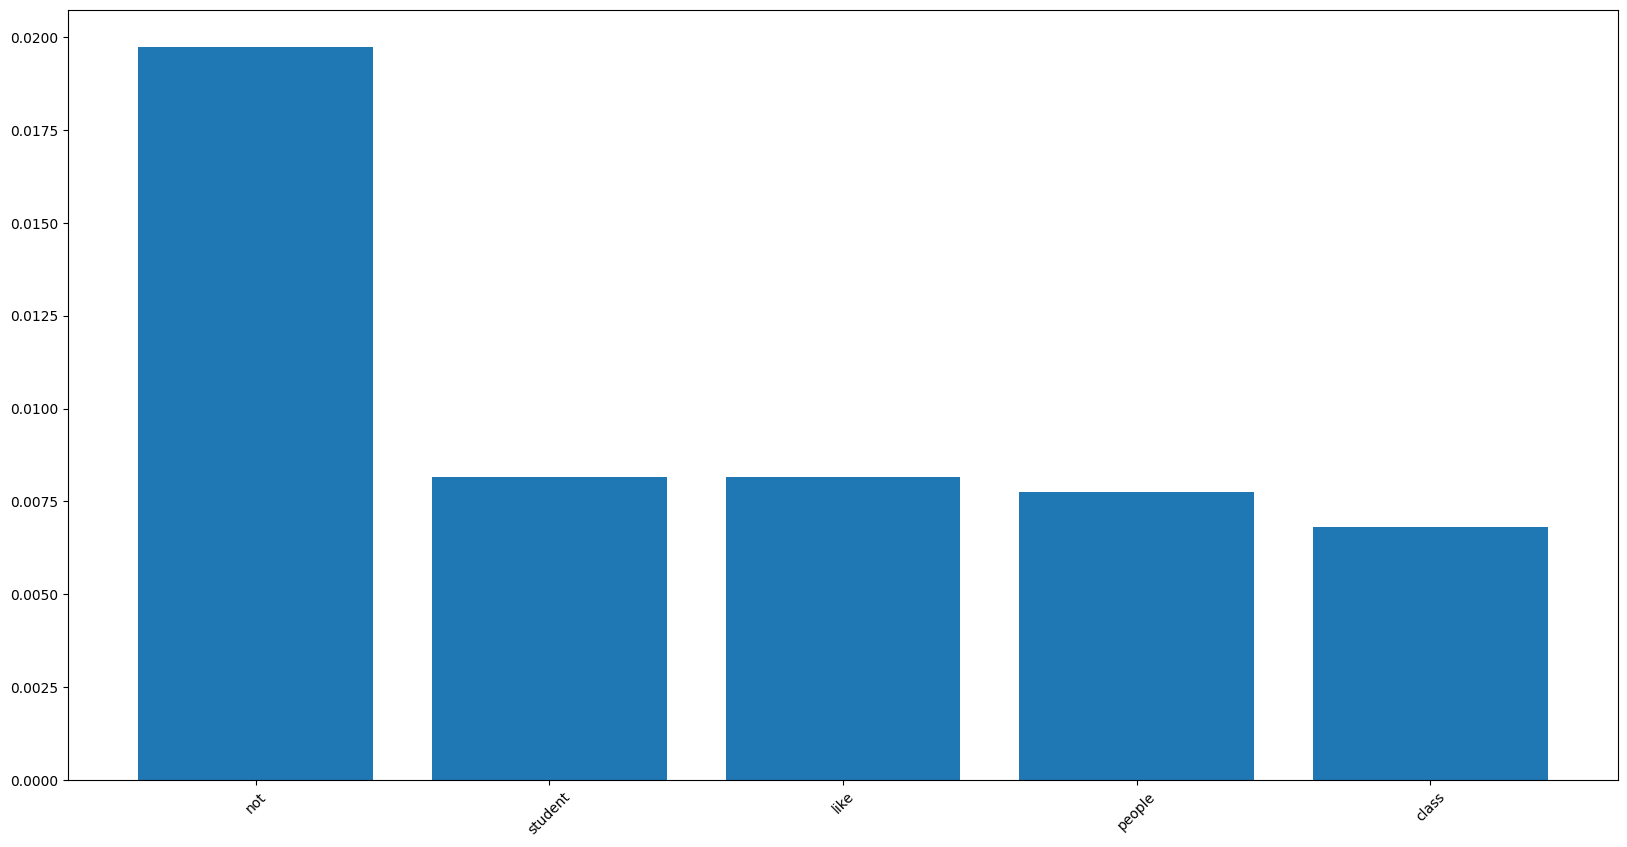

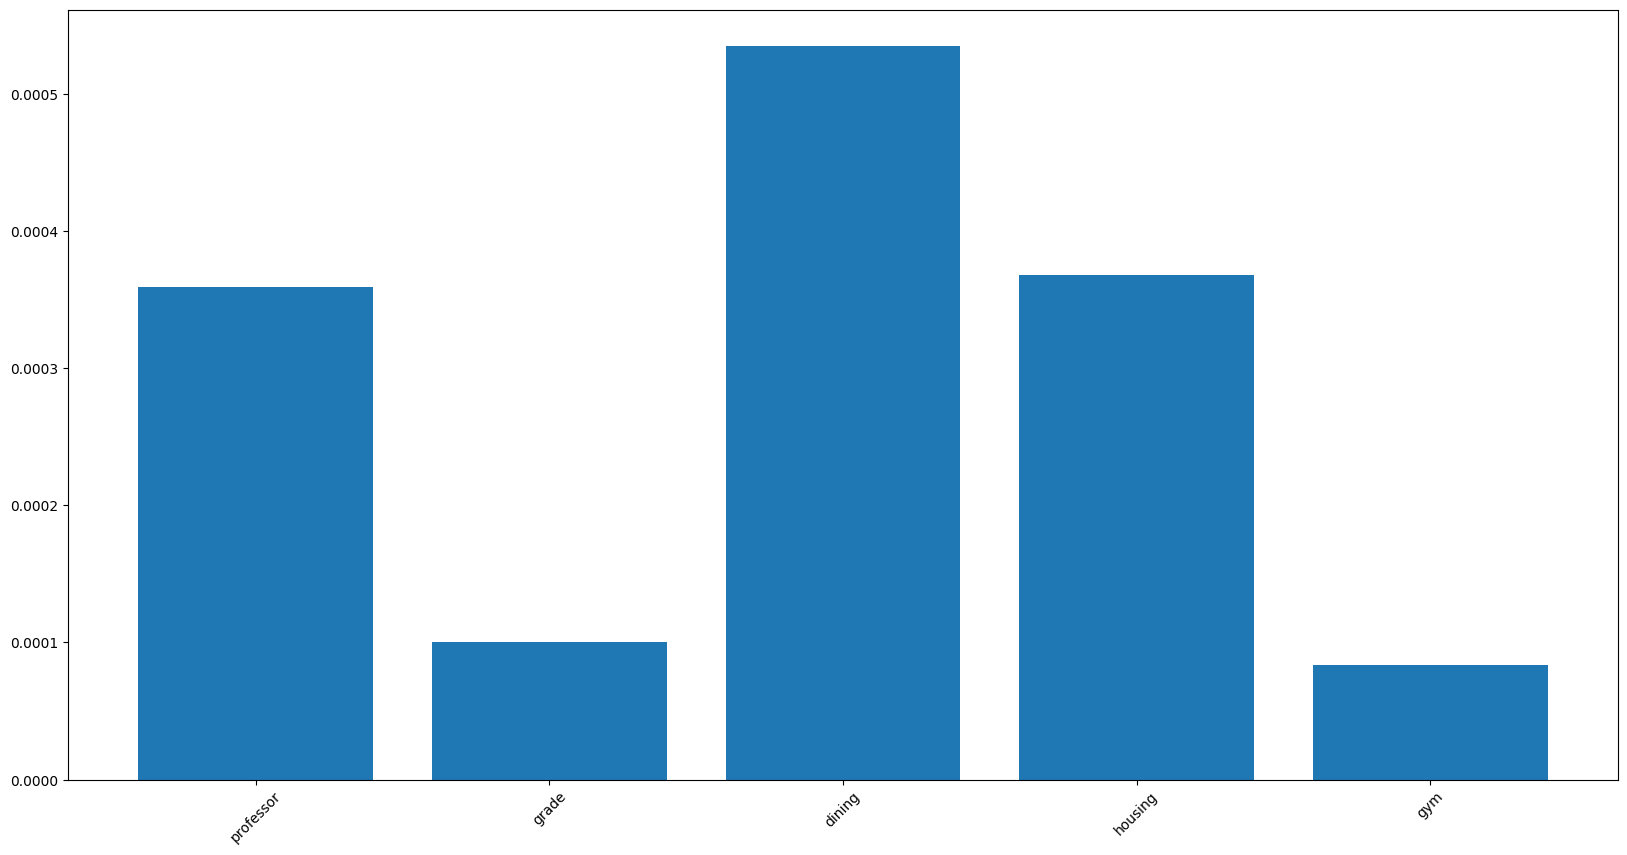

In [28]:
uiuc=pd.read_csv("uiuc.csv")

plot_list = word_counts.head(5)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

uiuc['cleaned_text'] = uiuc['text'].apply(clean)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(uiuc['cleaned_text'])

bow_df = pd.DataFrame(bag_of_words.toarray(), columns=vectorizer.get_feature_names_out())
word_counts = bow_df.sum()
word_counts = word_counts.sort_values(ascending=False)
word_counts

word_counts = word_counts / word_counts.sum()

plot_list=word_counts[["professor", "grade", "dining", "housing", "gym"]]
plot_list

plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()

#First graph is the first 5 words in the UIUC dataset. This is including stopwords. Then I did just the 5 words that I picked for the michigan dataset, and tried them on the UIUC dataset. 



Some interesting differences I noticed in the UIUC graph compared to the MICH graph were that dining and housing were much more frequent in UIUC's subreddit. Michigan spoke of professors more, however, and neither really talked about grades or the gym. 

### Problem 3: using the provided combined dataframe, train a logistic regression model using the sklearn Logistic Regression implementation. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html. Create a bag of words table from the combined data, and use that along with the "label" column to train the classifier. Please try this out and be prepared with issues or questions next Monday. We will be discussing in class

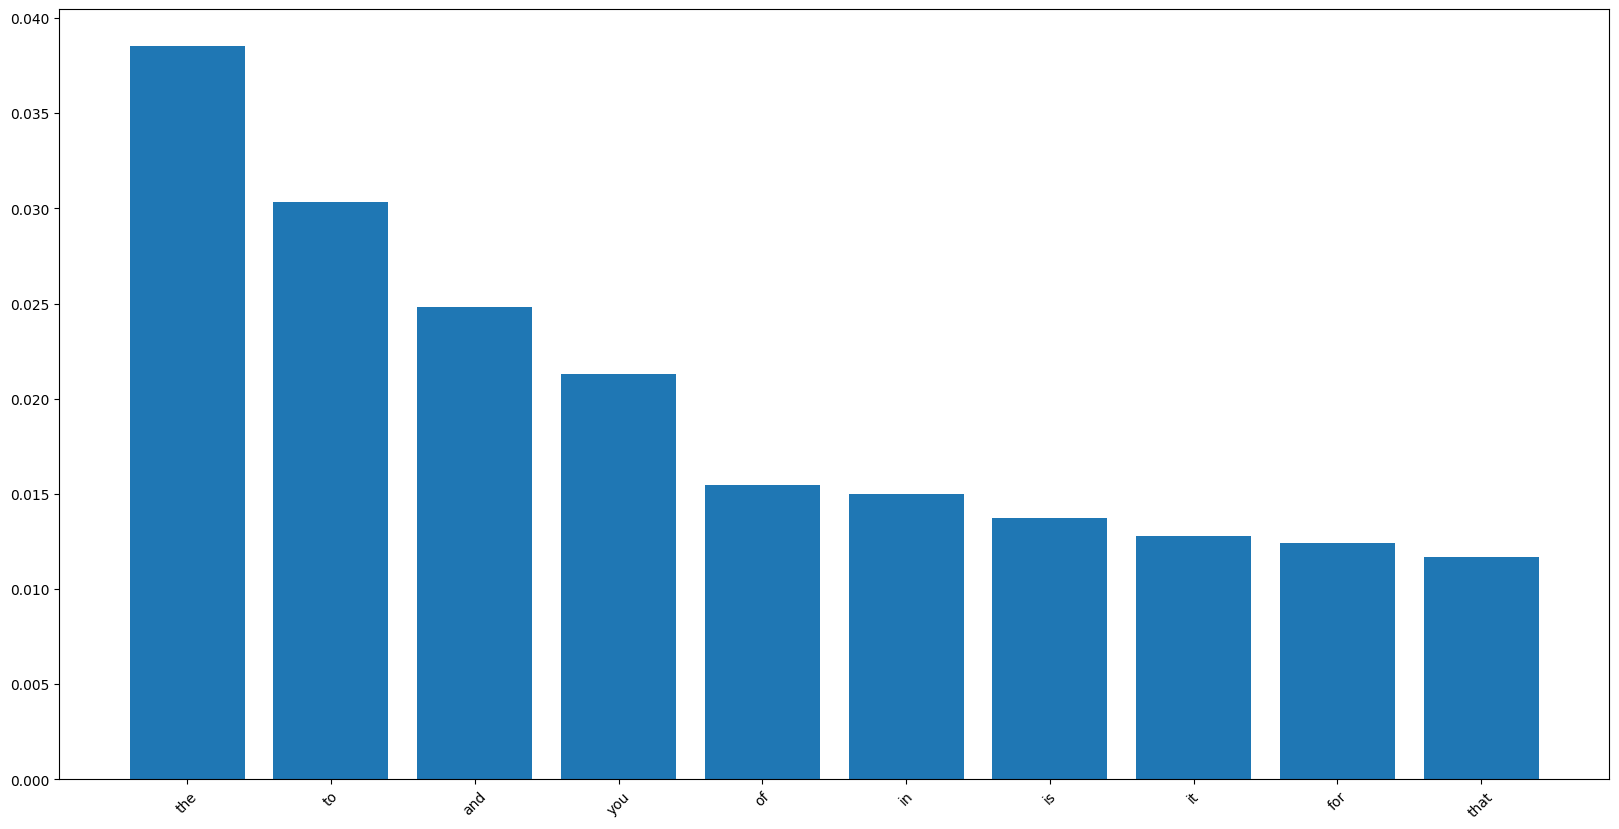

In [29]:
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])

plot_list = word_counts.head(10)
plt.figure(figsize=(20,10))
plt.bar(plot_list.index, plot_list.values)
plt.xticks(rotation=45)
plt.show()


In [30]:
#clean and lemmatize the data csv
data['cleaned_text'] = data['text'].apply(clean)


In [31]:
#create a bag of words representation with count vectorizer
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])

In [32]:
#train a logistic regression model using the bag of words features as X and the label column as y
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = bag_of_words
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

y_pred = model.predict(X_test)

In [33]:
#report the accuracy of the model
accuracy_score(y_test, y_pred)
#92.11% accuracy


0.9206349206349206

#### Part 2: hold out part of the dataset using sklearn train_test_split (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Pass in your previously generated bag of words as X and the label column as y. Use only the X_train and y_train for training and hold out the X_test and y_test to score the model on unseen data.

In [34]:
# what is the accuracy of the model? Is it better or worse than previous?Why do you think it has changed? 
X = bag_of_words
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

#70.423% accuracy. This is worse than the previous model. This is because the previous model was trained on the same dataset that it was tested on. This model was trained on a held out (or smaller) version of the dataset. 



0.7

#### Part 3: Examine the top features of your model using the following code

In [35]:
#get the coefficients of the model and plot the top 10 most positive and top 10 most negative coefficients
#what do you notice about these words? Are they surprising or expected?
#The words are not surprising or unexpected, they basically make sense as the illinois words are specific to illinois and michigan words are specific to michigan.



In [36]:
##coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_[0]})
#coefficients = coefficients.sort_values('coefficient', ascending=False)
#top_10_positive = coefficients.head(10)
#top_10_negative = coefficients.tail(10)

coefficients = pd.DataFrame({'feature': vectorizer.get_feature_names_out(), 'coefficient': model.coef_[0]})
coefficients = coefficients.sort_values('coefficient', ascending=False)
top_10_positive = coefficients.head(10)
top_10_negative = coefficients.tail(10)
print(top_10_positive)
print(top_10_negative)

         feature  coefficient
14692       uiuc     2.504536
7014    illinois     2.041853
5856    grainger     1.945176
14981     urbana     1.885108
12050       rsos     1.848069
7009      illini     1.686802
7955         las     1.654115
3351    danville     1.608935
2155   champaign     1.564569
46            ac     1.486846
         feature  coefficient
5034   festifall    -1.698484
2115     central    -1.725419
3691        diag    -1.734963
561          ann    -1.740585
4311        eecs    -1.770435
14059      texas    -1.975666
14712         um    -2.010977
14719      umich    -2.438905
5414      fresno    -2.495343
8845    michigan    -2.852469


In [37]:
#examine these words and see if they make sense. Do they differentiate UIUC from another university?
#Yes, they do differentiate UIUC from another university. The words are specific to UIUC and are not general words. They are words that are much more in line with something that someone who goes here would use

### Problem 4: Train a 10 topic topic model from the UIUC subreddit data using Gensim LDA. (https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html) If you get here before Wednesday 9/11, don't rush to finish, but feel free to continue ahead. We will go through this in class. Print out the top words in each topic, and read through the words for each topic to decide the theme of the topic: remember this is subjective and there are no right or wrong answers. Print out a few comments with high frequencies of each topic and analyze if your topic labels were representative. 

In [18]:

import csv

def csv_to_unicode_list(file_path):
    documents = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            documents.append(" ".join(row))  # Convert row to a single Unicode string
    return documents

file_path = "uiuc.csv"
docs = csv_to_unicode_list(file_path)

from nltk.tokenize import RegexpTokenizer

# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

# Lemmatize the documents.
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc] for doc in docs]

# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make an index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

top_topics = model.top_topics(corpus)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

for topic_id in range(num_topics):
    words = model.show_topic(topic_id, topn=10)  # Get top 10 words
    words = [word for word, _ in words]
    print(f"Topic {topic_id}: {', '.join(words)}")

for topic_id in range(num_topics):
    print(f"\n=== Topic {topic_id} ===")
    topic_docs = []
    
    for doc_id, doc in enumerate(corpus):
        topic_probs = model.get_document_topics(doc)
        dominant_topic = max(topic_probs, key=lambda x: x[1])  # Get most likely topic
        if dominant_topic[0] == topic_id and dominant_topic[1] > 0.5:  # Filter strong matches
            topic_docs.append(" ".join(docs[doc_id]))  # Reconstruct comment
    
    # Print a few examples
    for comment in topic_docs[:3]:  # Show first 3 matching comments
        print(f"- {comment}")



Number of unique tokens: 820
Number of documents: 4726
Average topic coherence: -2.8797.
[([(0.04911394, 'to'),
   (0.03933752, 'the'),
   (0.034690157, 'and'),
   (0.034245178, 'you'),
   (0.026871461, 'it'),
   (0.02283194, 'of'),
   (0.016722267, 'that'),
   (0.015183484, 'is'),
   (0.014370785, 'in'),
   (0.011766256, 'are'),
   (0.011724257, 'they'),
   (0.011678595, 'but'),
   (0.011444219, 'your'),
   (0.011288262, 'have'),
   (0.011162763, 'if'),
   (0.0106262285, 'be'),
   (0.010608206, 'people'),
   (0.01041881, 'on'),
   (0.010195202, 'for'),
   (0.00916629, 'not')],
  -1.2317309453270822),
 ([(0.07714423, 'the'),
   (0.047263306, 'and'),
   (0.035771817, 'to'),
   (0.02202622, 'that'),
   (0.021906974, 'of'),
   (0.021014571, 'for'),
   (0.020510575, 'you'),
   (0.02042345, 'is'),
   (0.01892055, 'are'),
   (0.017840156, 'they'),
   (0.017374702, 'with'),
   (0.01711207, 'be'),
   (0.01690038, 'have'),
   (0.01559139, 'in'),
   (0.014869314, 'will'),
   (0.011598607, 'can')

Topic 1 is just talking about the school base
Topic 2 is similar, a lot of stop words its hard to tell
Topic 3 I believe is about class registration
Topic 4 seems to be about the technological systems at UIUC
Topic 5 is about the "uiuc pervert?" whoever that is
Topic 6 is again stop words, hard to tell
Topic 7 is about graduation requirements
Topic 8 is about dining or food I believe
Topic 9 is about the social aspect of uiuc
Topic 10 is housing and questions related to it



After printing out comments, my topic labels were NOT representative. It seems like just looking at the words (which a lot of were just stop words) is not enough, you really do need the context to be able to tell what the information is about, at least in my opinion

Citations:
Used chatgpt for help with converting csv file to unicode strings
Borrowed the rest of the code from website provided, left comments in for clarity of understanding